In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pame.simparser import LayerSimParser #Interface for handling simulation results
from skspec import *
from skspec.plotting import splot
from skspec.data import aunps_glass

['dti', 'd', 'h', 'm', 'us', 's', 'ms', 'intvl', 'ns']


In [15]:
%pylab inline
import skspec.plotting.plot_utils as pv_utils

DPI = 600
TEXTSIZE = 17
TICKSIZE = 15
LEGENDSIZE = 13 #<--- I don't think this is used
LINEWIDTH = 3.5

# # Labels
rcParams['axes.labelsize'] = TICKSIZE
rcParams['xtick.labelsize'] = TICKSIZE
rcParams['ytick.labelsize'] = TICKSIZE

# Font and text
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Also used by latex (this is default already)
#rcParams['font.weight'] = 'bold'  # These don't work
#rcParams['font.style'] = 'oblique'
rcParams['font.size'] = TEXTSIZE     #Matplotlib title, labels

#Lines
rcParams['lines.linewidth'] = LINEWIDTH

# # Legend
rcParams['legend.loc'] = 'upper right'
rcParams['legend.fontsize'] = LEGENDSIZE
rcParams['legend.fancybox'] = True
rcParams['legend.scatterpoints'] = 1  # Draw one scatter point in legend   
rcParams['legend.markerscale'] = 1.5 # But make it large

# PLOT KWDS
kwds = dict(linewidth=LINEWIDTH,
            grid=None)

Populating the interactive namespace from numpy and matplotlib


## Parameters for PAME

1. AuNP: d = 80nm, **Vfrac = 0.2310**; AgNP: d = 60nm, **Vfrac = 0.0976**.
In order to compare the sensitivity of AuNP to AgNP, we use the **same number** of AuNPs and AgNPs. So the raito of AuNPs and AgNPs volume fraction = $4^3:3^3$ = 2.4:1.

2. Using LinearSum model for the mixture of gold and silver, alpha = 0.57, beta = 0.42.

## LSPR Profile of Mixed Au&Ag NPs

In [10]:
ls

50npreal.png*                     AuAg_sameheight_protein.ipynb
All_bsa_glyc_by_1                 bsa_shell_sim.ipynb*
AuAg_protein.ipynb                glycerin_simulation.ipynb
AuAg_sameheight_protein1.mpickle  glyc.png
AuAg_sameheight_protein2.mpickle  SAM_pametest.ipynb


In [7]:
s0=LayerSimParser.load_pickle('AuAg_protein_1.mpickle')
s0.backend='skspec'

sa0=LayerSimParser.load_pickle('Au_protein_1.mpickle')
sa0.backend='skspec'
sb0=LayerSimParser.load_pickle('Simulations/Ag_protein_1.mpickle')
sb0.backend='skspec'

ax1,ax2 = splot(2,1, figsize=(6,8))
ref0=s0.primary_panel()['R_avg'][0]
ref0.plot(ax=ax2, title='LSPR band of Mixed AuAg NPs')
refa0=sa0.primary_panel()['R_avg'][0]
refa0.plot(ax=ax1)
refb0=sb0.primary_panel()['R_avg'][0]
refb0.plot(ax=ax1, title='LSPR band of AuNPs and of AgNPs')

IOError: [Errno 2] No such file or directory: 'AuAg_protein_1.mpickle'

## Protein Binding Response

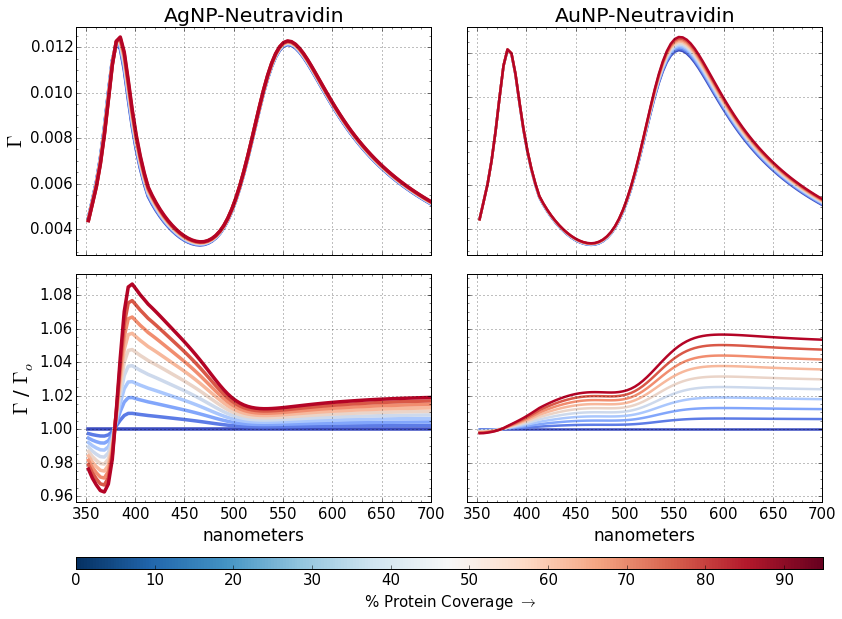

In [64]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,8))

s1=LayerSimParser.load_pickle('AuAg_sameheight_protein1.mpickle')
s1.backend='skspec'

ref1=s1.primary_panel()['R_avg']
ref1.plot(ax=ax2, title='AuNP-NeutrAvidin', linewidth=2.5, grid=False)

ref1.reference = 0
ref1.plot(ax=ax4, title='', norm='r', linewidth=2.5, grid=False)

s2=LayerSimParser.load_pickle('AuAg_sameheight_protein2.mpickle')
s2.backend='skspec'

ref2=s2.primary_panel()['R_avg']
ref2.plot(ax=ax1, title='AgNP-NeutrAvidin', **kwds)

ref2.reference = 0
ref2.plot(ax=ax3, title='', norm='r', **kwds)

#Hide axis
pv_utils.hide_axis(ax1, axis='x')
pv_utils.hide_axis(ax2, axis='x')
pv_utils.hide_axis(ax2, axis='y')
pv_utils.hide_axis(ax4, axis='y')

ax1.set_ylabel('$\Gamma$', size=20)
ax3.set_ylabel('$\Gamma$ / $\Gamma_o$', size=20)

# Normalize y-values in normalized plots
#ax3.set_ylim(.98,1.095)
#ax4.set_ylim(.98,1.095)
ylim = ax3.get_ylim()
ax4.set_ylim(ylim)

# Xlims
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlim(340,700)
    
fig.tight_layout()


#Colorbar
cax = fig.add_axes([0.1, -0.01, 0.865, 0.02])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=95)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(cax, cmap='RdBu_r',
                                   norm=norm,
                                   orientation='horizontal')
cb1.set_label(r'% Protein Coverage $\rightarrow$', fontsize=15)

# If bug and colorbar gets cutoff during save
# http://stackoverflow.com/questions/10101700/moving-matplotlib-legend-outside-of-the-axis-makes-it-cutoff-by-the-figure-box
#plt.savefig('/home/glue/Dropbox/Writeups_Notes_and_Applications/PLANNED_PAPERS/PAMEPAPER/images/protein_sim_plot/protsim_unaltered.png',
#            dpi=600,
#            bbox_extra_artists=(cax,), 
#            bbox_inches='tight')

In [ ]:
ax1, ax2, ax3, ax4 = splot(2,2, figsize=(12,8))

slice1 = ref1.ix[460:700]
slice1.plot(ax=ax1, title='Protein binding on AuNP')
slice1.plot(ax=ax3, title='', norm='r')

slice2 = ref2.ix[365:460]
slice2.plot(ax=ax2, title='Protein binding on AgNP')
slice2.plot(ax=ax4, title='', norm='r')

## Compare the Response of Multiplexed Biosensor with Biosensor of only AuNPs or AgNPs

In [ ]:
ax1, ax2, ax3, ax4 = splot(2,2, figsize=(12,8))

ref1=s1.primary_panel()['R_avg']
ref1.plot(ax=ax1, title='Multisensor')

s3=LayerSimParser.load_pickle('../Simulations/Au_protein_1.mpickle')
s3.backend='skspec'

ref3=s3.primary_panel()['R_avg']
ref3.plot(ax=ax2, title='AuNPs sensor')

ref1.reference = 0
ref1.plot(ax=ax3, title='', norm='r')
ref3.reference = 0
ref3.plot(ax=ax4, title='', norm='r')

In [ ]:
ax1, ax2, ax3, ax4 = splot(2,2, figsize=(12,8))

ref2=s2.primary_panel()['R_avg']
ref2.plot(ax=ax1, title='Multisensor')

s4=LayerSimParser.load_pickle('../Simulations/Ag_protein_1.mpickle')
s4.backend='skspec'

ref4=s4.primary_panel()['R_avg']
ref4.plot(ax=ax2, title='AgNPs sensor')

ref2.reference = 0
ref2.plot(ax=ax3, title='', norm='r')
ref4.reference = 0
ref4.plot(ax=ax4, title='', norm='r')